# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다.
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다.
    * 여러분은 이 프로젝트팀에 DX 컨설턴트로써 데이터분석을 맡았습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!
----
* 반복되는 코드는 함수로 만듭시다!
    * 함수를 만드는 순서
        * 먼저 절차대로 코드를 작성해서 실행한다.
        * 실행된 코드(오류가 없는 코드)를 가져다 함수로 구성한다.
            * 입력과 출력 결정

# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

In [38]:
def eda_1_n(data, var, bins = 30) :
    display(data[[var]].describe().T)
    print()

    plt.figure(figsize = (6,6))
    plt.subplot(2,1,1)
    sns.histplot(x=data[var], bins = 20, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])

    plt.tight_layout()
    plt.show()

## (1) Sales (Target)

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포 확인

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


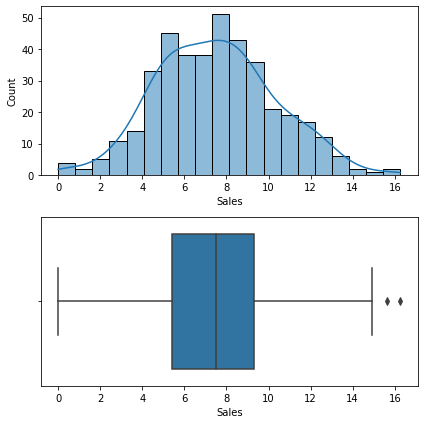

In [39]:
eda_1_n(data, 'Sales')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

- 양극단값 낮은 이유 분석 필요

## (2) CompPrice

1) 변수의 비즈니스 의미

In [11]:
# 경쟁사 가격
data['CompPrice']

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

2) 기초통계량 및 분포 확인

In [24]:
data[['CompPrice']].describe()

,CompPrice
count,400.000000
mean,124.975000
std,15.334512
min,77.000000
25%,115.000000
50%,125.000000
75%,135.000000
max,175.000000


In [26]:
data['CompPrice'].value_counts().sort_index()

77     1
85     1
86     1
88     1
89     2
      ..
157    2
159    2
161    1
162    2
175    1
Name: CompPrice, Length: 73, dtype: int64

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


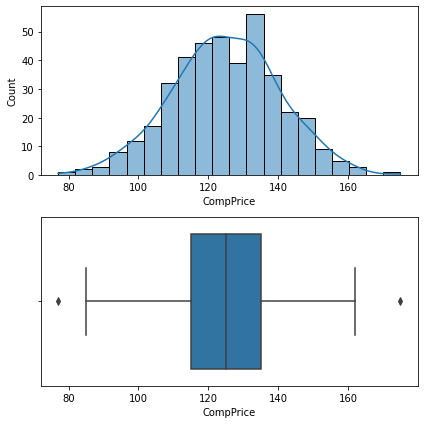

In [40]:
eda_1_n(data, 'CompPrice')

<AxesSubplot:xlabel='CompPrice', ylabel='count'>

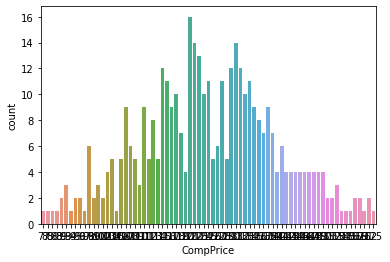

In [32]:
sns.countplot(data=data, x='CompPrice')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 평균으로 몰려있다

4) 추가 분석해 볼 사항이 있나요?

- 경쟁사 가격 분포 차이가 많이난다, 지역별 차이 확인필요
- 경쟁사 가격이 하나인이유 분석
- 어떤기간 측정한건지 확인

## (3) Income

1) 변수의 비즈니스 의미

In [18]:
# 지역 평균 소득
data['Income']

0       73
1       48
2       35
3      100
4       64
      ... 
395    108
396     23
397     26
398     79
399     37
Name: Income, Length: 400, dtype: int64

2) 기초통계량 및 분포 확인

In [20]:
data[['Income']].describe()

,Income
count,400.000000
mean,68.657500
std,27.986037
min,21.000000
25%,42.750000
50%,69.000000
75%,91.000000
max,120.000000


,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


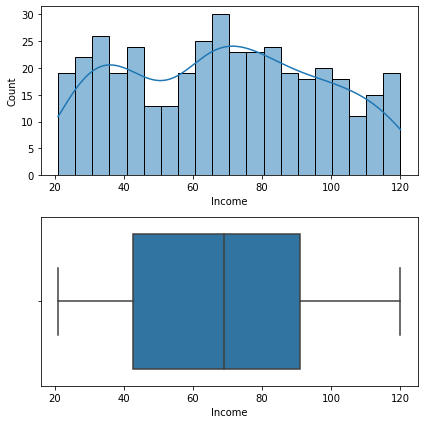

In [48]:
eda_1_n(data, 'Income')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 소득 차이가 많이난다
- 균등분포 / 분포 몰리는 구간이 없다
- 분포 여러개여서 박스플롯으로 분석 어려움

4) 추가 분석해 볼 사항이 있나요?

- 상중하로 나누어 분석
- 단위가 언제인지

## (4) Advertising

1) 변수의 비즈니스 의미

In [43]:
# 각지역, 회사의 광고예산
data[['Advertising']]

,Advertising
0,11
1,16
2,10
3,4
4,3
...,...
395,17
396,3
397,12
398,7


2) 기초통계량 및 분포 확인

In [21]:
data[['Advertising']].describe()

,Advertising
count,400.000000
mean,6.635000
std,6.650364
min,0.000000
25%,0.000000
50%,5.000000
75%,12.000000
max,29.000000


,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


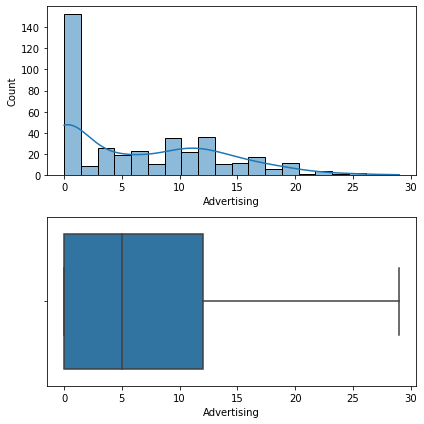

In [50]:
eda_1_n(data, 'Advertising')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 광고비 0원이 젤 많다

4) 추가 분석해 볼 사항이 있나요?

- 광고비 0만 띄어내고 나머지 분석

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


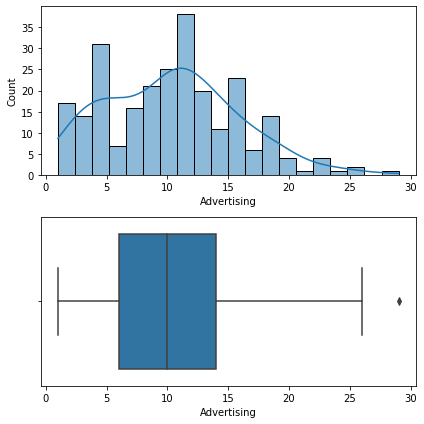

In [56]:
temp=data.loc[ data['Advertising'] !=0 ]
eda_1_n(temp, 'Advertising')

## (5) Population

1) 변수의 비즈니스 의미

In [45]:
# 지역 인구수
data[['Population']]

,Population
0,276
1,260
2,269
3,466
4,340
...,...
395,203
396,37
397,368
398,284


2) 기초통계량 및 분포 확인

In [22]:
data[['Population']].describe()

,Population
count,400.000000
mean,264.840000
std,147.376436
min,10.000000
25%,139.000000
50%,272.000000
75%,398.500000
max,509.000000


,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


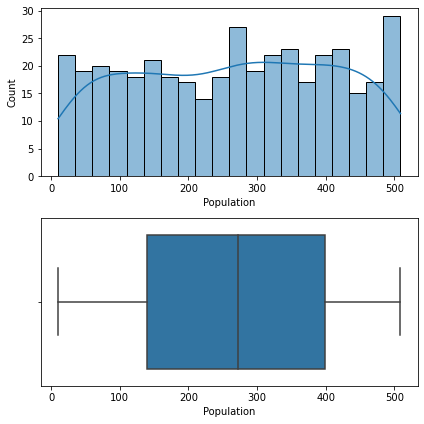

In [51]:
eda_1_n(data, 'Population')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

In [13]:
# 자사 지역별 판매 가격
data['Price']

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

2) 기초통계량 및 분포 확인

In [16]:
data[['Price']].describe()

,Price
count,400.000000
mean,115.795000
std,23.676664
min,24.000000
25%,100.000000
50%,117.000000
75%,131.000000
max,191.000000


,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


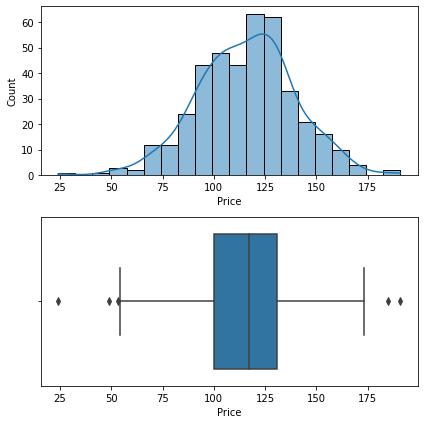

In [49]:
eda_1_n(data, 'Price')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 자사 지역별 판매 가격이 다양하다
- 평균, 중앙값 비슷
- 사분위수간 간격 비슷

4) 추가 분석해 볼 사항이 있나요?

- 가격경쟁력 확인을 위해 자사-타사 가격 변수 생성 시도해보면 좋을 것이다
- 광고에 따른 판매양
- price가 평균값인지 확인

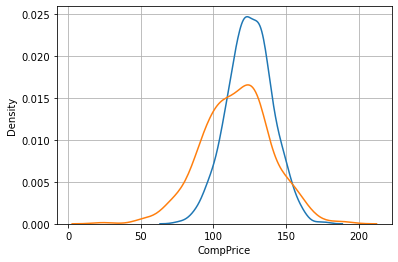

In [54]:
sns.kdeplot(x='CompPrice', data=data)
sns.kdeplot(x='Price', data=data)
plt.grid()
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

In [ ]:
# 지역주민 평균연령

2) 기초통계량 및 분포 확인

In [23]:
data[['Age']].describe()

,Age
count,400.000000
mean,53.322500
std,16.200297
min,25.000000
25%,39.750000
50%,54.500000
75%,66.000000
max,80.000000


,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


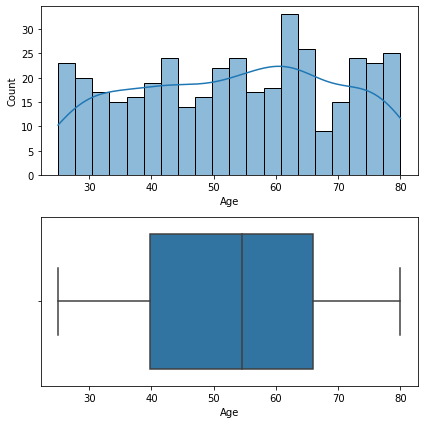

In [52]:
eda_1_n(data, 'Age')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 지역의 나이는 60대 초중반이 가장 많다
- 평균연령 70대 이상인 지역도 있고, 손자를 낳은 자식이 함께 살고 있지 않는한 카시트 판매에는 적합하지 않아보인다

4) 추가 분석해 볼 사항이 있나요?

- 평균연령 20대 구간 분석 필요하다 / 신혼부부, 대학가
- 평균나이이므로 나이에 대한 도수분포표 확인 가능

# ========================

# 4.단변량분석 : 범주형 변수

In [57]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

## (1) Urban

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량 및 분포 확인

 <<<  Urban   >>


,Class,Count,Prop
0,Yes,282,0.705
1,No,118,0.295


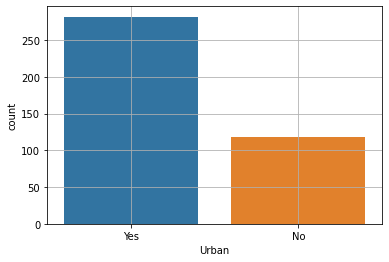

In [58]:
var = 'Urban'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음

4) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

## (2) ShelveLoc

1) 변수의 비즈니스 의미

In [ ]:
# 진열상태

2) 기초통계량 및 분포 확인

 <<<  ShelveLoc   >>


,Class,Count,Prop
0,Medium,219,0.5475
1,Bad,96,0.2400
2,Good,85,0.2125


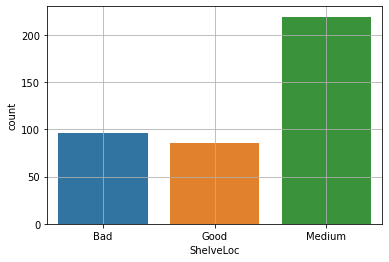

In [59]:
eda_1_c(data, 'ShelveLoc')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 좋다/나쁘다 비율 비슷하다
- 왜 매장관리 안됐지? 생각!
- 진열상태 평가기준?

4) 추가 분석해 볼 사항이 있나요?

- 진열상태 중간인 데이터만 확인하여 진열상태를 배재한 상태로
- 다른 변수와 판매량과의 관계 볼 수 있다
- 좋다/나쁘다에 따른 판매량 분석
- 어떤 매장들인지 분석

## (3) US

1) 변수의 비즈니스 의미

In [ ]:
# 매장이 미국에 있는지 여부

2) 기초통계량 및 분포 확인

 <<<  US   >>


,Class,Count,Prop
0,Yes,258,0.645
1,No,142,0.355


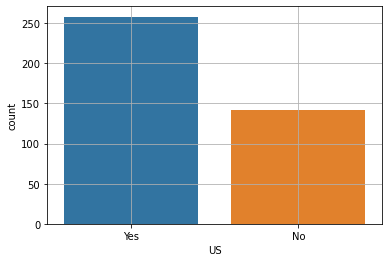

In [62]:
eda_1_c(data, 'US')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 미국내/외 지점따른 매출액차이 확인
- 온/오프라인 판매량 비교

4) 추가 분석해 볼 사항이 있나요?

- 미국내/외 지점따른 매출액차이 원인 분석
- 해외시장 개척